Starting reachability analysis...
Reachability analysis completed. Number of reachable states: 26
d_step: 0.23684210526315785, theta_step: 0.33069396353576774
threshold_d: 0.11842105263157893, threshold_theta: 0.16534698176788387
Number of final squares after subdivision: 1


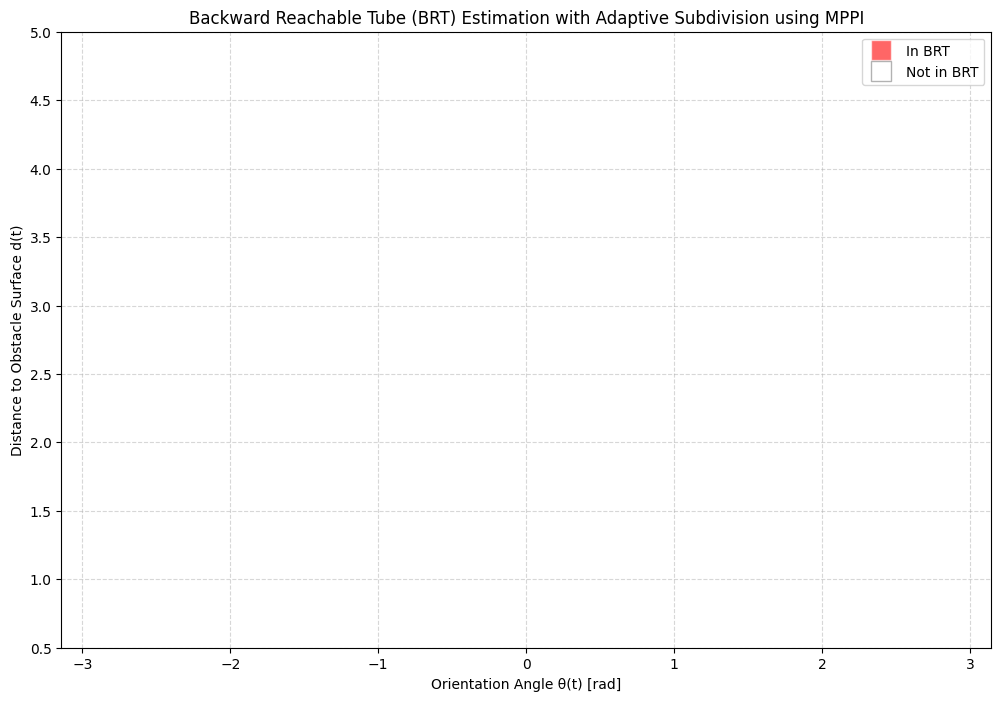

In [2]:
from mppi_reachability import MPPIController, MPPIParams, CarEnv, reachability_analysis, plot_reachable_set
import jax
import jax.numpy as jnp

# Initialize
env = CarEnv(v=3.0, R=1.0, dt=0.01)
H = int(0.5 / 0.01)  # Time horizon steps

# MPPI parameter
control_params = MPPIParams(
    gamma_mean=0.0,       # Disable mean updates
    gamma_sigma=0.0,      # Disable variance updates
    discount=1,
    a_mean=jnp.zeros(H),  # Shape (H,)
    a_var=jnp.full(H, 0.1),  # Shape (H,)
)

# Controller
mppi_controller = MPPIController(env, control_params, N=100, H=H, lam=1.0)

print("Starting reachability analysis...")
reachable_set = reachability_analysis(env, mppi_controller, T=0.5, N_samples=100, dt=0.01)
print(f"Reachability analysis completed. Number of reachable states: {len(reachable_set)}")

plot_reachable_set(reachable_set, num_d=20, num_theta=20)
